<a href="https://colab.research.google.com/github/ayubuinelektrikndk/Pemrograman_Python/blob/main/Perancangan_FTTB_Tubes_SKO_Ayu_Buin_Elektrik_N_D_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ayu Buin Elektrik N.D.K

Kelas : TT - 42  - 07

Nim : 1101184201

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [143]:
#Converter
NtL = lambda x: 10*np.log10(x)
LtN = lambda x: 10**(x/10)

#Parameter
SM = 6 #safety margin 3 dB
R = 0.8 # Responsivitas (A/W)
M = -0.23 #Tambahan daya sinyal APD (dB)
q = 1.6*10**-19
K = 1.38 * 10**-23 #Konstanta Boltzman
Teff= 290 #Kelvin
B = 8*10**9 #Bandwith (Hz) 
RL = 50 #Ekivalensi Resistensi (Ohm)
id = 200*10**-9 #Arus gelap(A)
F = 1 #F(M), Faktor Gain

#Perhitungan jarak
#Jarak dari Sentral Ke ODP = 16 km
#Jarak dari ODP ke Roset = <500 m --> 3*25 = 75 m (Jarak per lantai 3 m, berada pada lantai 25)
#Jarak Total = 16000 + 75 = 16075 m

d = np.arange(0.075,16.076,1) #Jarak (km)
L_fiber = 0.28 #0.28 #Loss dari fiber berdasarkan jenis G625D (dB)  
N_splicer = 8 #Jumlah Splicer
L_splicer = 0.1 #Loss dari splicer (db)
N_connector = 6 #Jumlah Konektor
L_connector = 0.3 #Loss dari konektor (dB)
L_splitter = 16 + 16 #loss dari splitter (dB) 
Pt = 3 #Daya tx (dBm)

In [144]:
#RUMUS PR
def P_receive():
  #Pr,Pt (dBm)
  #L_fiber,N_splitter,L_splicer,N_connector,L_connector,L_splitter (dB)

  hambatan_fiber = d * L_fiber
  hambatan_splicer = N_splicer * L_splicer
  hambatan_connector = N_connector * L_connector

  alfa_total = hambatan_fiber + hambatan_splicer + hambatan_connector + L_splitter + SM
  Pr = Pt - alfa_total
  return Pr,alfa_total
Pr,alfa_total = P_receive()
print('Hambatan Total = ', alfa_total)
print('\nDaya Terima = ', Pr)

Hambatan Total =  [40.621 40.901 41.181 41.461 41.741 42.021 42.301 42.581 42.861 43.141
 43.421 43.701 43.981 44.261 44.541 44.821 45.101]

Daya Terima =  [-37.621 -37.901 -38.181 -38.461 -38.741 -39.021 -39.301 -39.581 -39.861
 -40.141 -40.421 -40.701 -40.981 -41.261 -41.541 -41.821 -42.101]


In [145]:
#Signal Power
def signal_power():
  Pr_num = LtN(Pr)
  ip = Pr_num * R
  Is_kuadrat = (ip*M)**2
  return ip,Is_kuadrat
ip,Is_kuadrat = signal_power()
print('Arus Primer = ', ip)
print('\nIs^2 = ', Is_kuadrat)

Arus Primer =  [1.38353448e-04 1.29714936e-04 1.21615796e-04 1.14022350e-04
 1.06903023e-04 1.00228213e-04 9.39701645e-05 8.81028560e-05
 8.26018905e-05 7.74443942e-05 7.26089217e-05 6.80753663e-05
 6.38248771e-05 5.98397798e-05 5.61035041e-05 5.26005139e-05
 4.93162434e-05]

Is^2 =  [1.01259469e-09 8.90093534e-10 7.82412258e-10 6.87757992e-10
 6.04554761e-10 5.31417248e-10 4.67127727e-10 4.10615790e-10
 3.60940525e-10 3.17274849e-10 2.78891736e-10 2.45152116e-10
 2.15494230e-10 1.89424280e-10 1.66508208e-10 1.46364464e-10
 1.28657659e-10]


In [146]:
#RUMUS SNR
def SNR():
  #PARAMETER PELENGKAP RUMUS NOISE
  BDC = 2*q*id*B*(M**2)*F #Dark Current (Numerik)
  SN = 2*q*ip*B*(M**2)*F #Shot Noise (Numerik)
  NT = (4*K*Teff*B)/RL #Noise Thermal (Numerik)

  #PARAMETER RUMUS
  Signal = Is_kuadrat # (Numerik)
  Noise = BDC + SN + NT # (Numerik)

  #RUMUS SNR
  SNR = Signal / Noise
  SNR_dBm = NtL(SNR)
  
  return SNR, SNR_dBm

SNR, SNR_dBm = SNR()
print('SNR dalam numerik = ', SNR)
print('\nSNR dalam logaritmik = ', SNR_dBm)

SNR dalam numerik =  [392.47195086 345.14818159 303.52211393 266.90924878 234.70705867
 206.38521696 181.47698374 159.57161292 140.30766043 123.36708777
 108.470067    95.37040441  83.8515098   73.72284664  64.81680626
  56.98595553  50.10061386]

SNR dalam logaritmik =  [25.93808624 25.3800559  24.82190338 24.26363623 23.70526151 23.14678586
 22.58821552 22.02955635 21.47081383 20.91199313 20.35309908 19.79413624
 19.23510887 18.67602096 18.11687628 17.55767835 16.99843047]


In [147]:
#RUMUS Q
def Q_rumus():
  Q_rumus = (0.5*10**(SNR_dBm/20)) #penurunan rumus SNR
  return Q_rumus
Q = Q_rumus()
print('Q factor = ', Q)

Q factor =  [9.90545242 9.28908205 8.71094303 8.16867873 7.66007602 7.18305675
 6.73566967 6.3160829  5.92257673 5.55353689 5.2074482  4.8828886
 4.5785235  4.29310047 4.02544427 3.77445213 3.53908936]


In [148]:
#RUMUS BER
pengkali_list = []
def BER_rumus():
  #PARAMETER PELENGKAP RUMUS BER
  akar = 1/(Q * m.sqrt(2 * m.pi))

  #PERULANGAN YANG DIGUNAKAN UNTUK KALKULASI Q PASA LIBRARY MATH
  for i in range(len(Q)):
    pengkali = m.exp(-(Q[i]**2)/2)
    pengkali_list.append(pengkali)
  #RUMUS BER
  BER = (1/akar)*(pengkali_list)

  return BER
  
BER = BER_rumus()
print('BER = ', BER)

BER =  [1.22719600e-20 4.26647196e-18 7.27625157e-16 6.63116769e-14
 3.48197348e-12 1.12565194e-10 2.37500285e-09 3.44273731e-08
 3.58711494e-07 2.79546405e-06 1.68741128e-05 8.13601431e-05
 3.21946999e-04 1.07073698e-03 3.05637115e-03 7.62707649e-03
 1.69113760e-02]


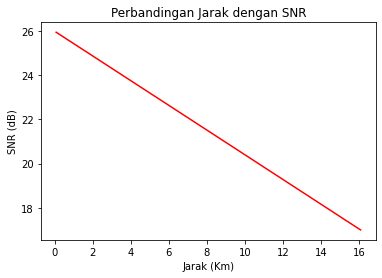

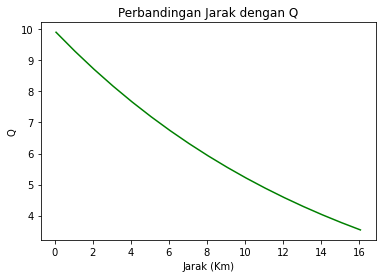

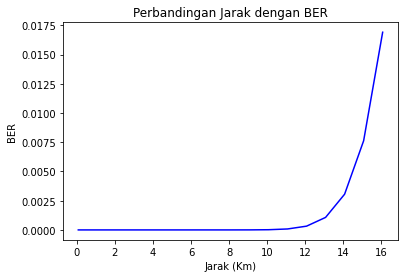

In [149]:
#GRAFIK

#GRAFIK PERBANDINGAN JARAK DENGAN SNR
def grafik_1():
  plt.figure()
  plt.plot(d,SNR_dBm,'r')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

#GRAFIK PERBANDINGAN JARAK DENGAN Q-FACTOR
def grafik_2():
  plt.figure()
  plt.plot(d,Q,'g')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

#GRAFIK PERBANDINGAN ANTARA JARAK DENGAN BER
def grafik_3():
  plt.figure()
  plt.plot(d,BER,'b')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()


grafik_1()
grafik_2()
grafik_3()